# Lab-3 : Training with MNIST data

In [5]:
# to plot images import the necessary libraries        
#%pylab       
import matplotlib
import matplotlib.pyplot as plt
# use matplotlib as inline
%matplotlib inline 

import tensorflow as tf
import numpy as np

In [2]:
#from libs.datasets import MNIST
#mnist = MNIST()
from tensorflow.examples.tutorials.mnist import input_data

# save the MNIST data in to the folder /mnist/datat/
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


See what the MNIST images look like

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


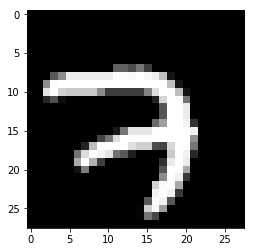

In [7]:
# print the label for the first training data in mnist
print(mnist.train.labels[0])
# See the first training image looks like
plt.imshow(np.reshape(mnist.train.images[0], (28, 28)), cmap='gray')

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


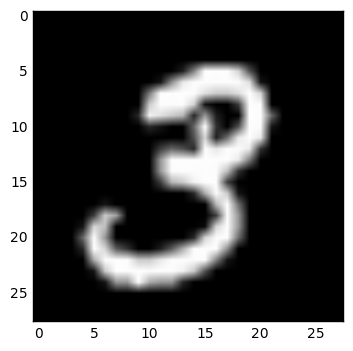

In [6]:
plt.figure()
print(mnist.train.labels[1])
# okay and what does the input look like
plt.imshow(np.reshape(mnist.train.images[1], (28, 28)), cmap='gray')

See the size of the mnist.train.labels

In [7]:
print(mnist.train.labels.shape)
print(mnist.train.labels[0])

(55000, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define the placeholder for input images. 

In [8]:
# image placeholder
x = tf.placeholder("float", [None, 784])

Declare the Weight and the Bias variables

In [9]:
# Weight and Bias variables
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

Multiply x with W, and apply the softmax function on the result

In [10]:
# Model Definition
y = tf.nn.softmax(tf.matmul(x,W) + b)

# Placeholder for the true labels
y_ = tf.placeholder("float", [None,10])

Define the Loss function. Here use the cross entropy function for the loss function

In [11]:
# Loss function
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

Use the Gradient Descent Optimizer for the Optimizer, and set the train operation to minimize the cross_entropy with this optimizer. 

In [13]:
# training operation
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [15]:
# initialize all variables
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

mnist.train.next_batch(10) calls 10 training images and 10 labels as a batch and input the training images in batch_xs, and the training labels in batch_ys.
Feed batch_xs and batch_ys when starting the Session.

In [16]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(10)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Define an operation which counts the number of vectors which have the largest value at the same place. That is, count how many y and y_ vectors have the maximum value in the same place

In [17]:
# Count the number of right classification. 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

Calculate the accuracy 

In [18]:
# define the function for the accuracy. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

print (sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.8951
